#     Check PHYS format R22
<!-- - ref1: https://its.cern.ch/jira/secure/attachment/249526/ref1-p4252-samples.txt
- ref2: https://its.cern.ch/jira/secure/attachment/249798/ref2-p4252-samples.txt
- JIRA: https://its.cern.ch/jira/browse/ATLPHYSVAL-667 -->

- R22 sample:
   - valid1.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.deriv.DAOD_PHYS.e7107_e5984_s3227_r12405_p4441
   - 1619000 raw events
- R21 sample:
    - mc16_13TeV:mc16_13TeV.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.deriv.DAOD_EXOT8.e7107_s3126_r9364_p4089
    - 1617000 raw events

<!-- ## Compare 10000 raw events using the following files
- valid1.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.deriv.DAOD_PHYS.e7107_e5984_s3227_r12007_r12045_r12032_p4252/DAOD_PHYS.22510506._000001.pool.root.1

- valid1.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.deriv.DAOD_PHYS.e7107_e5984_s3227_r11825_p4252/DAOD_PHYS.22486126._000009.pool.root.1 -->

In /Users/zhangrui/opt/anaconda3/envs/hh4b/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zhangrui/opt/anaconda3/envs/hh4b/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/zhangrui/opt/anaconda3/envs/hh4b/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/zhangrui/opt/anaconda3/envs/hh4b/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

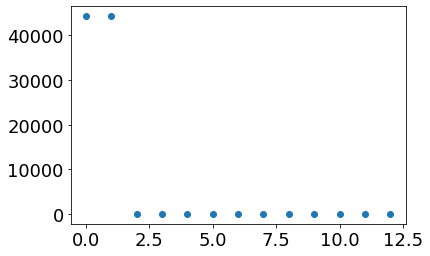

In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18

version = '_TDT'
f_names = [f'~/Work/Code/HH4b/NNT/R22/NNT_450000_MC16e_R21{version}.root', f'~/Work/Code/HH4b/NNT/R22/NNT_450000_valid1_R22{version}.root']
leg = ['R21', 'R22']

f_files = [uproot.open(i) for i in f_names]
h_2b = [f_file['TwoTagCutflow'] for f_file in f_files]
h_4b = [f_file['FourTagCutflow'] for f_file in f_files]
plt.scatter(range(len(h_4b[0].values())), h_4b[0].values())


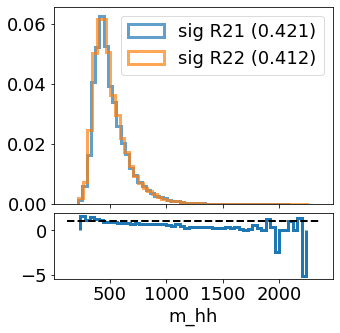

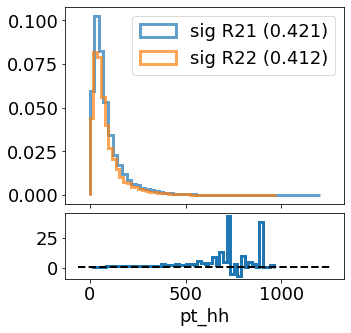

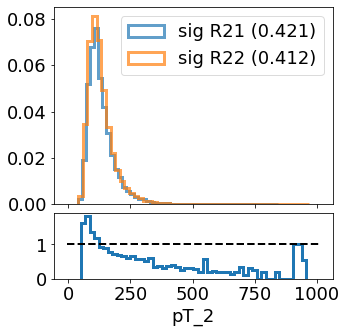

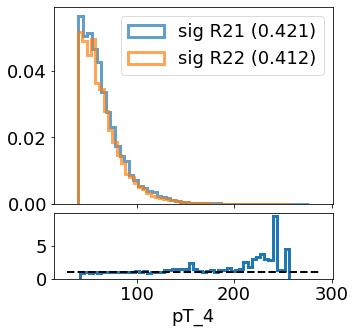

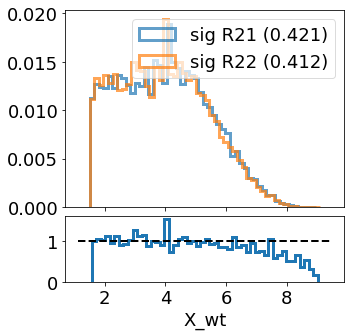

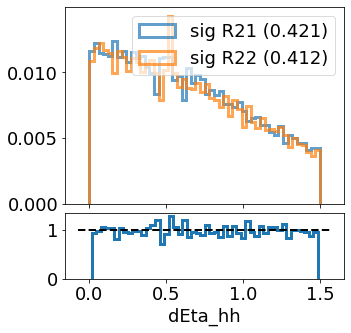

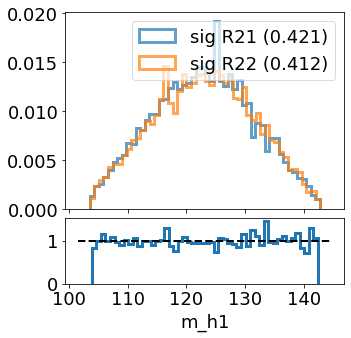

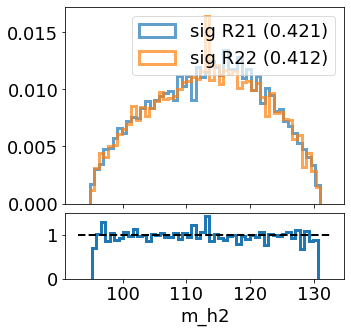

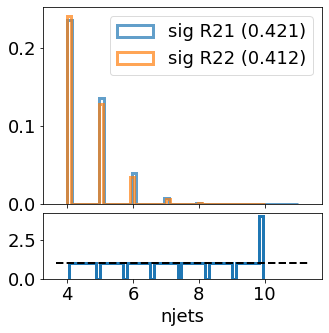

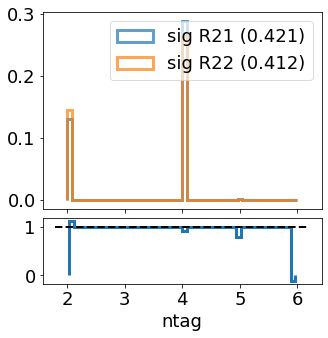

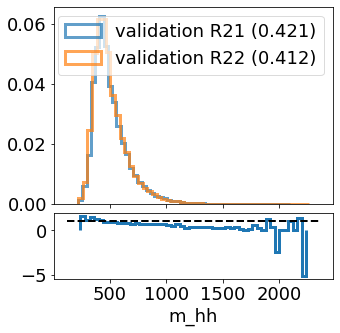

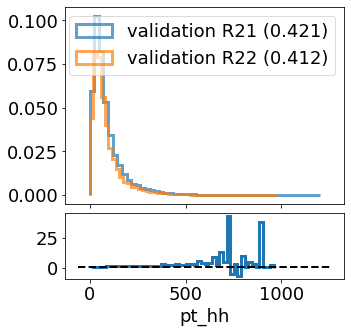

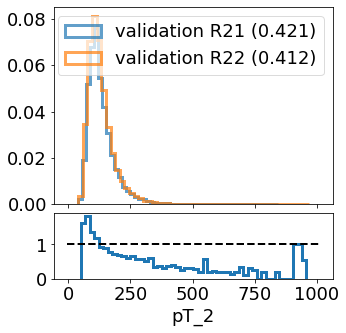

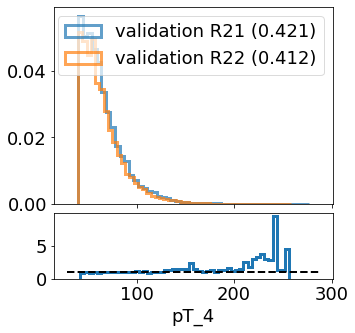

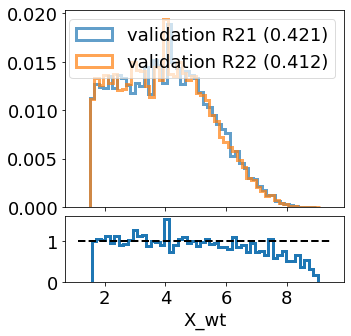

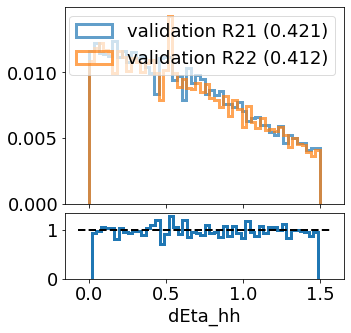

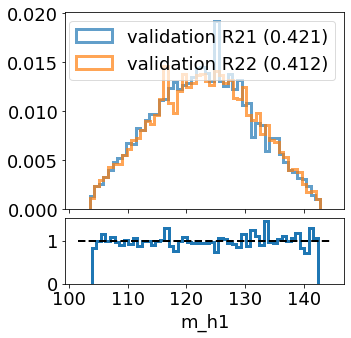

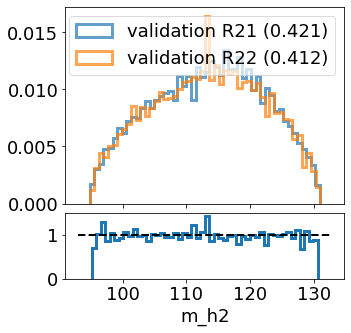

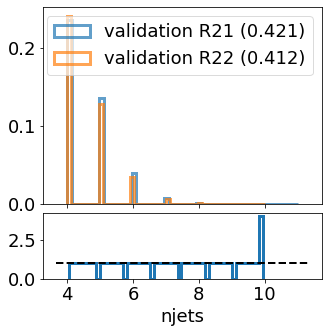

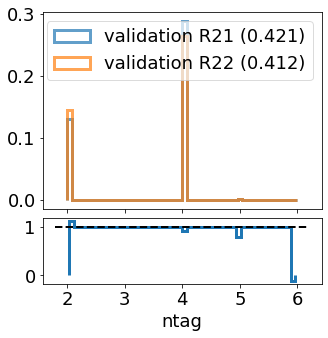

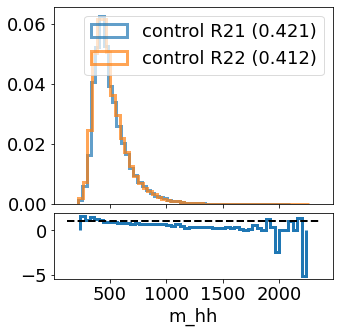

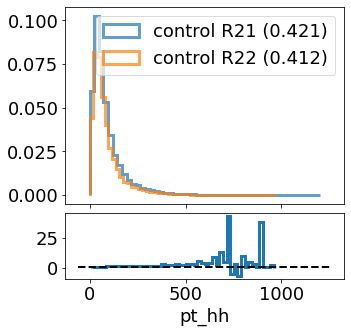

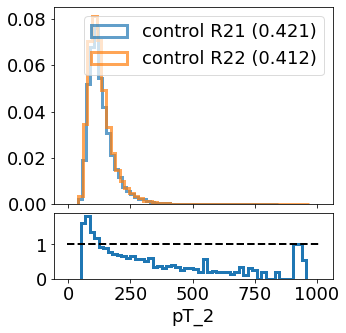

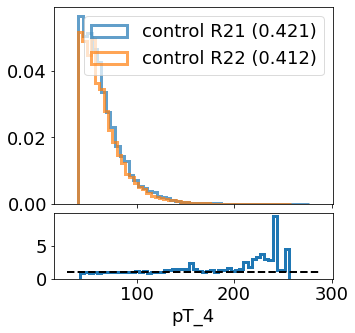

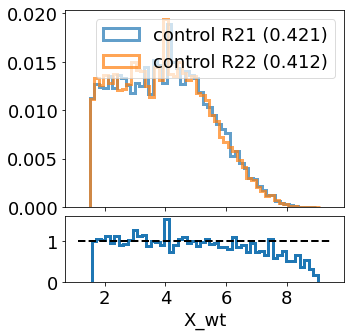

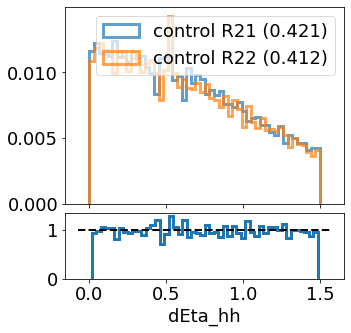

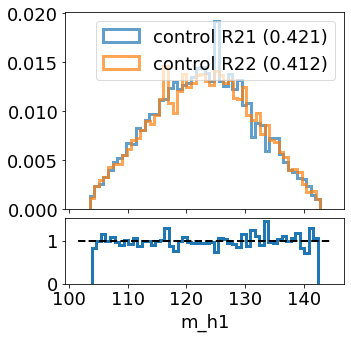

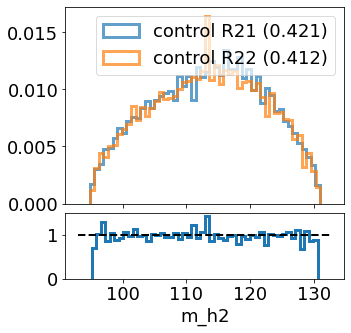

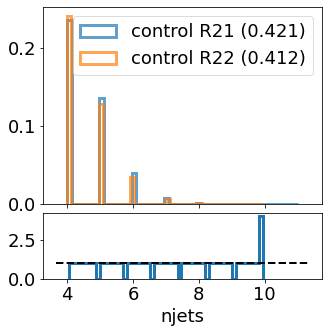

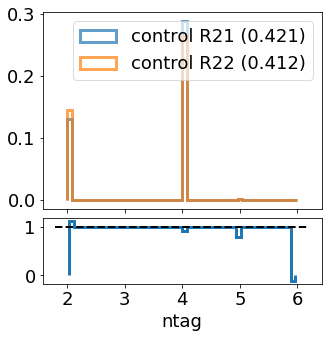

In [2]:
ratio_fig_style = {
    'figsize': (5, 5),
    'gridspec_kw': {'height_ratios': (3, 1)},
}
# import pdb
variables = ['m_hh', 'pt_hh', 'pT_2', 'pT_4', 'X_wt', 'dEta_hh', 'm_h1', 'm_h2', 'njets', 'ntag']
for reg in ['sig', 'validation', 'control']:
    for var in variables:
        fig, (ax, rax) = plt.subplots(2, 1, sharex=True, **ratio_fig_style)
        fig.subplots_adjust(hspace=.07)  # this controls the margin between the two axes
        y, r = {}, {}
        for i, f_file in enumerate(f_files):
            t_file = f_file['sig']
#             pdb.set_trace()
            y[i], x, _ = ax.hist(t_file[var].array(), weights=t_file['mc_sf'].array()[:, 0], histtype = 'step', lw=3, bins = 50, alpha=0.7, label=f'{reg} {leg[i]} ({sum(t_file["mc_sf"].array()[:, 0]):.3f})')
            r[i] = np.divide(y[i], y[0], out=np.ones_like(y[0]), where = y[0]!=0)
        ratio = 1619000./1617000  if version == '' else 1
        rax.plot(ax.get_xlim(), (ratio, ratio), 'k--', lw=2)
        x = (x[1:] + x[:-1]) / 2
        rax.hist(x, bins=len(r[i]), weights=r[i], histtype = 'step', lw=3)
        rax.set_xlabel(var)
        ax.legend(loc='best', framealpha=0.7)
        plt.show()
